# Objective: In this exercise, we will engage in classification of images of handwritten digits ‘0’ and ‘1’ using k-nearest neighbor (k-NN) classification.


Training Dataset
The training dataset for this problem corresponds to the images of handwritten digits ‘0’ and ‘1’ that come
prepackaged with the sklearn package. There are a total of 360 images of digits ‘0’ and ‘1’; we will divide
them into 300 images for training purposes, while we will evaluate the performance of k-NN classification
on the remaining 60 images, which we will refer to as the “test” set.1 You can use the following code to
obtaining the training and the test sets.

In [33]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

k-NN Classification Using 2-D Features
1. Carry out principal component analysis (PCA) of images in the training set and compute two-dimensional
PCA features of training images.
    
    • Display the two-dimensional features of training images as points on a two-dimensional scatter
plot. Color all points corresponding to digits ‘0’ as red and all points corresponding to digits ‘1’ as
green.


2. Classify each image in the test set by first transforming it to the two-dimensional PCA domain using the
principal components obtained above and then using k-NN classification with k = 5 and the distance
metric being $||·||_2$.

    • Display the two-dimensional features of test images as points on a two-dimensional scatter plot.
Color all points that are correctly classified as blue and all points that are incorrectly classified as
black.

3. Compute and display the average classification error for the test set, defined as $1/N \sum_{i=1}^{N} 1_{\widehat{y_i}\neq y_i}$ ; here $y_i$ denotes the true label of the i-th image, $\widehat{y}_i$ denotes the label returned by k-NN, and N = 60 in this particular problem

In [34]:
# Problem 1
# perform PCA on the training data
import numpy as np
# First we need to use SVD on the data set
U , s, Vh = np.linalg.svd(training_images)
print ("The singular vectors of the training images are")
print (U)
#We want the top two principal components
print("The principal components of the images are")
print (U[:,0:2])
#Compute the PCA Features
X_tilde = (U[:,0:2]).T @ training_images

The singular vectors of the training images are
[[ 5.23085422e-02 -6.46431286e-02  1.63896995e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.95771218e-02  8.12866201e-02  7.30928749e-03 ...  6.81797541e-02
   6.27777148e-03  1.42489325e-02]
 [ 5.91380147e-02 -4.47621578e-02  1.46082646e-05 ... -6.78685008e-03
  -3.49868269e-02 -8.36984400e-02]
 ...
 [ 5.34928686e-02  3.32519146e-03 -1.33769903e-01 ...  7.42914682e-01
   1.61932012e-02 -2.43195489e-02]
 [ 6.14768552e-02 -7.40035614e-02  9.42785279e-03 ...  1.25851002e-02
   8.50828980e-01 -5.21089756e-02]
 [ 6.16685686e-02 -7.20600427e-02  1.70487957e-02 ... -1.12457916e-02
  -5.09288141e-02  8.58931408e-01]]
The principal components of the images are
[[ 0.05230854 -0.06464313]
 [ 0.05957712  0.08128662]
 [ 0.05913801 -0.04476216]
 [ 0.05795182  0.06762063]
 [ 0.06421645 -0.05044293]
 [ 0.0602047   0.06294291]
 [ 0.05979799 -0.07715445]
 [ 0.06527025 -0.0483167 ]
 [ 0.05059654  0.05710633]
 [ 0.05030162  0.05752349]
 [ 

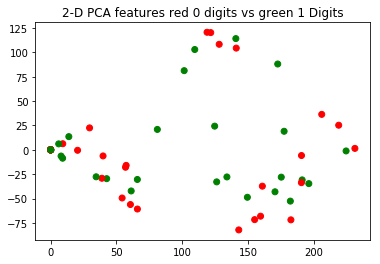

In [35]:
# Now we need to make a 2-Dimensional scatterplot. 0's are red and 1's are green
from matplotlib import pyplot as plt
fig = plt.figure()
plt.scatter (X_tilde.T[:,0], X_tilde.T[:,1], color = ['red','green'])
plt.title("2-D PCA features red 0 digits vs green 1 Digits")
plt.show()

In [36]:
#Problem 2
# We have to transform our test_images with the Principal components from the last problem
#PC_images = test_images @ X_tilde

#We know need to do k-NN classification, For this we need integer k and the distance metric. We are given k=5 and distance is ||*||_2
# We first need to calculate the distance
Vi = np.linalg.norm(training_images)
Vo = np.linalg.norm(test_images)
Distance = Vi - Vo
print ("Distance is " , Distance)


Distance is  590.0331098342776


# k-NN classification using Higher- Dimensional Features

1. Carry out PCA of images in the training set and compute r-dimensional PCA features of training images such that the top-r principal components capture 95% of variation within the training data.

2. Classify each image in the test set by first transforming it to the r-dimensional PCA domain using the principal components obtained above and then using k-NN classification with the distance metric being $||·||_2$ and k being an odd integer from 1 to 9.
    
    • Provide a labeled plot of the average classification error for the test set as a function of k.
  
    • Based on the plot, what value of k will you recommend be used for future k-NN classification of
digits ‘0’ and ‘1’?